# 🐶End-to-end Multi-class Dog Breed Classification

This notebook build an end-to-end multi-class image classifier using TensorFlow 2.0 and Tensorflow Hub.


## 1. Problem

Identifying the breed of a dog given an image of a dog.

When I'm sitting at the cafe and I take a Photo of a dog , I want to know what breed of dog it is.


## 2. Data

The data we're  using is from kaggle's dog breed identification.

https://www.kaggle.com/competitions/dog-breed-identification/data

## 3. Evaluation

The evaluation is file with prediction probabilities for each dog breed of each test image.

www.kaggle.com/competitions/dog-breed-identification/overview/evaluation


## 4. Features

Some information about the data:
* We're dealing with images (unstructure image ) so it's probably best we use deep learning /transfer learning .
* There are 120 breeds of dogs (this means there are 120 different classes).
* There are around 10,000+ images in the training sets (these images have labels).
* There are around 10,000+ images in the test set (these images have no labels , because we'll want to predict them).

### Getting our workspace ready

* Import TensorFlow 2.x
* Import tensorflow Hub
* Make sure we're using GPU

In [5]:
# !pip install tensorflow_hub

In [6]:
# Import necessary tools
import tensorflow as tf
import tensorflow_hub as hub
print("TF hub version:", hub.__version__)
print("TF version:" , tf.__version__)

TF hub version: 0.13.0
TF version: 2.10.1


In [7]:
# check for GPU availability
print("GPU" , "available (YESSSS!!!!!)" if tf.config.list_physical_devices("GPU") else "not available:(")

GPU available (YESSSS!!!!!)


In [8]:
# !pip list

In [9]:
# %pip install tensorflow-hub==0.13.0

## Getting our data ready (turning into tensors)
with all machine learning models , our data has to be in numerical format , so that's what we'll be doing first. Turning our images into Tensors (numerical representations). 

Let's start by accessing our data and checking out the labels.

In [10]:
# pip install pandas==2.2.3

In [11]:
# check out the labels of our data 
import pandas as pd
labels_csv = pd.read_csv("dog-breed-identification/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())


                                      id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [12]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


<Axes: xlabel='breed'>

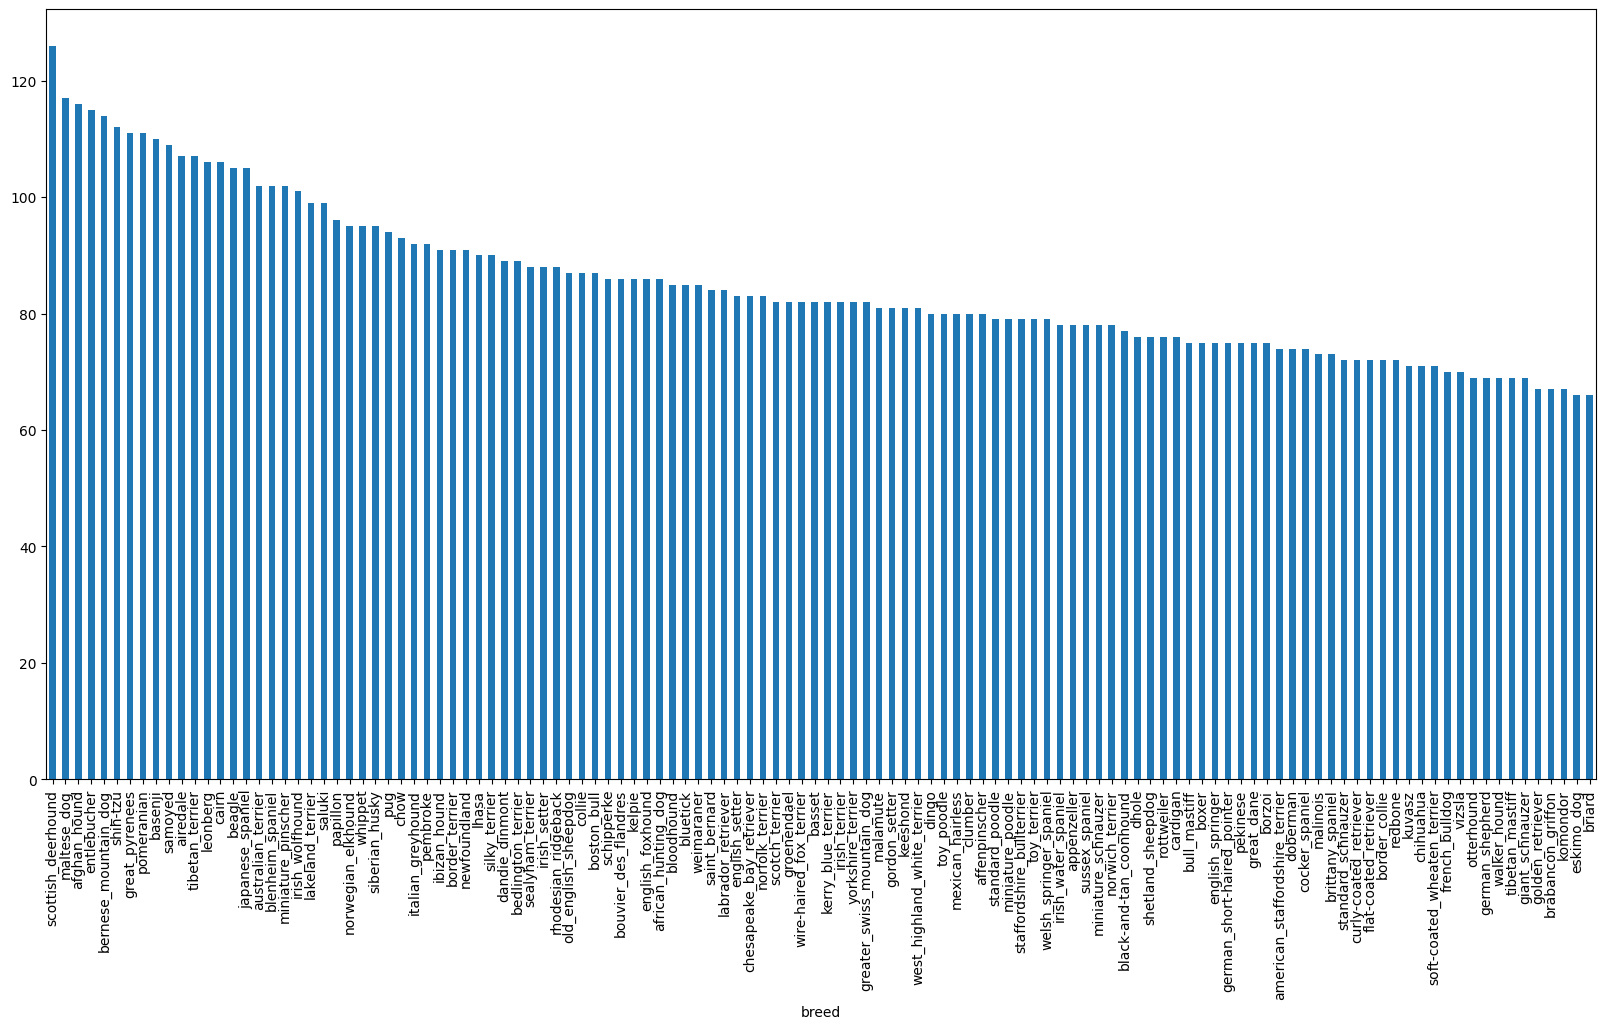

In [13]:
# how many images are there of each breeeds?
labels_csv["breed"].value_counts().plot.bar(figsize = (20 , 10))

In [14]:
labels_csv["breed"].value_counts().median()

82.0

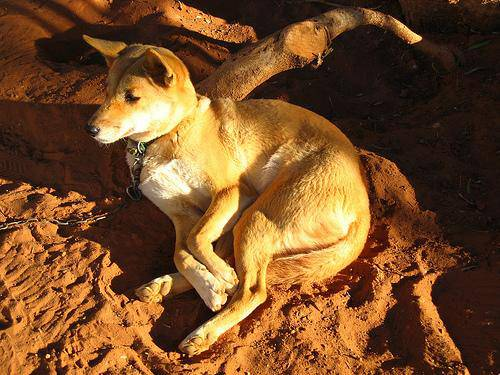

In [15]:
# let's view an image
from IPython.display import Image
Image("dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

### Getting images and their labels
Let's get a list of all of our image file pathnames.

In [16]:
len(labels_csv)

10222

In [17]:
filenames

NameError: name 'filenames' is not defined

In [18]:
labels_csv["id"][1000]

'18acb0833a0f70b25b772c383a5c49df'

In [19]:
filenames =  ["dog-breed-identification/train/" + fname for fname in labels_csv["id"] + ".jpg"]

In [20]:
len(filenames)

10222

In [21]:
filenames[:10]

['dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'dog-breed-identification/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'dog-breed-identification/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'dog-breed-identification/train/0042188c895a2f14ef64a918ed9c7b64.jpg']

In [22]:
import os
os.listdir("dog-breed-identification/")

['.ipynb_checkpoints',
 'custom_photo',
 'full_model_predictions_submission_1_mobilenetV2.csv',
 'full_model_predictions_submission_2_mobilenetV2.csv',
 'labels.csv',
 'logs',
 'logs_2',
 'models',
 'model_train_validation_full_data_predictions_submission_2_mobilenetV2.csv',
 'preds_array.csv',
 'sample_submission.csv',
 'test',
 'train']

In [23]:
len(os.listdir("dog-breed-identification/train"))

10222

In [24]:
i=0
for rawat in (os.listdir("dog-breed-identification/train/")):
    
    print(i , rawat)
    i=i+1

0 000bec180eb18c7604dcecc8fe0dba07.jpg
1 001513dfcb2ffafc82cccf4d8bbaba97.jpg
2 001cdf01b096e06d78e9e5112d419397.jpg
3 00214f311d5d2247d5dfe4fe24b2303d.jpg
4 0021f9ceb3235effd7fcde7f7538ed62.jpg
5 002211c81b498ef88e1b40b9abf84e1d.jpg
6 00290d3e1fdd27226ba27a8ce248ce85.jpg
7 002a283a315af96eaea0e28e7163b21b.jpg
8 003df8b8a8b05244b1d920bb6cf451f9.jpg
9 0042188c895a2f14ef64a918ed9c7b64.jpg
10 004396df1acd0f1247b740ca2b14616e.jpg
11 0067dc3eab0b3c3ef0439477624d85d6.jpg
12 00693b8bc2470375cc744a6391d397ec.jpg
13 006cc3ddb9dc1bd827479569fcdc52dc.jpg
14 0075dc49dab4024d12fafe67074d8a81.jpg
15 00792e341f3c6eb33663e415d0715370.jpg
16 007b5a16db9d9ff9d7ad39982703e429.jpg
17 007b8a07882822475a4ce6581e70b1f8.jpg
18 007ff9a78eba2aebb558afea3a51c469.jpg
19 008887054b18ba3c7601792b6a453cc3.jpg
20 008b1271ed1addaccf93783b39deab45.jpg
21 008ba178d6dfc1a583617470d19c1673.jpg
22 009509be3ca7cce0ff9e37c8b09b1125.jpg
23 0097c6242c6f3071762d9f85c3ef1b2f.jpg
24 00a338a92e4e7bf543340dc849230e75.jpg
25 00a366d

In [25]:
# chech whether number of filenames matches number of actual image files
import os
if len(os.listdir("dog-breed-identification/train/")) == len(filenames):
    print("Filenames match actual amount of files!!! Proceed.")
else:
    print("Filenames do not match actual amount of files , chech the target directory")

Filenames match actual amount of files!!! Proceed.


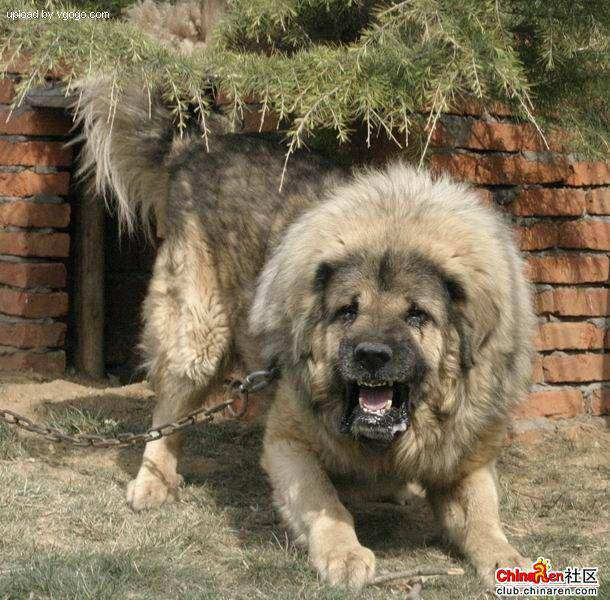

In [26]:
Image(filenames[9000])

In [27]:
labels_csv["breed"][9000]

'tibetan_mastiff'

Since we've now got out training image filepaths in a list , let's prepare our labels.

In [28]:
import numpy as np
labels = labels_csv["breed"].to_numpy()
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [29]:
len(labels)

10222

In [30]:
type(labels)

numpy.ndarray

In [31]:
# see if number of labels matches the number of filenames
if len(labels) == len(filenames):
    print("Number of labels matches number of filenames!")
else:
    print("Number of labels does not match number of filenames , check data directories!")

Number of labels matches number of filenames!


In [32]:
# find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [33]:
unique_breeds

array(['affenpinscher', 'afghan_hound', 'african_hunting_dog', 'airedale',
       'american_staffordshire_terrier', 'appenzeller',
       'australian_terrier', 'basenji', 'basset', 'beagle',
       'bedlington_terrier', 'bernese_mountain_dog',
       'black-and-tan_coonhound', 'blenheim_spaniel', 'bloodhound',
       'bluetick', 'border_collie', 'border_terrier', 'borzoi',
       'boston_bull', 'bouvier_des_flandres', 'boxer',
       'brabancon_griffon', 'briard', 'brittany_spaniel', 'bull_mastiff',
       'cairn', 'cardigan', 'chesapeake_bay_retriever', 'chihuahua',
       'chow', 'clumber', 'cocker_spaniel', 'collie',
       'curly-coated_retriever', 'dandie_dinmont', 'dhole', 'dingo',
       'doberman', 'english_foxhound', 'english_setter',
       'english_springer', 'entlebucher', 'eskimo_dog',
       'flat-coated_retriever', 'french_bulldog', 'german_shepherd',
       'german_short-haired_pointer', 'giant_schnauzer',
       'golden_retriever', 'gordon_setter', 'great_dane',
      

In [34]:
# Turn a single label into an array of booleans
print(labels[0])
labels[0] == unique_breeds

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [35]:
# Turn every labels into a boolean array
boolean_labels = [label == unique_breeds for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [36]:
len(boolean_labels)

10222

In [37]:
# Example : Turning boolean array into integers
print(labels[0])
print(np.where(unique_breeds==labels[0]))
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))

boston_bull
(array([19], dtype=int64),)
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


### Creating our own validation set
Since the dataset from kaggle doesn't come with a validation set, we're going to create our own

In [38]:
# Setup X and y variables
X = filenames
y = boolean_labels

In [39]:
len(filenames) , len(X)

(10222, 10222)

In [40]:
len(boolean_labels) , len(y)

(10222, 10222)

We're going to start off experimenting with ~1000 images and increase as needed

In [41]:
# Set number of images to use for expecting 
NUM_IMAGES = 1000   #@param {type: "slider" , min:1000 , max:10000 , step:1000}    <---this work in colab

In [42]:
# let's split our data into train and validation sets
from sklearn.model_selection import train_test_split


# split them into training and validation of total size NUM_IMAGES
X_train , X_val , y_train , y_val = train_test_split( X[:NUM_IMAGES],
                                                      y[:NUM_IMAGES],
                                                      test_size = 0.2,
                                                      random_state =42)

len(X_train) , len(X_val) , len(y_train) , len(y_val)

(800, 200, 800, 200)

In [43]:
# let's have a geez at the training data
X_train[:5] , y_train[:5]

(['dog-breed-identification/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'dog-breed-identification/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'dog-breed-identification/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'dog-breed-identification/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'dog-breed-identification/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, 

### Preprocessing Images (turning images into Tensors)

To preprocess our images into tensor we're going to write a function which does a few things:
1. Take an images filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our image (a jpg) into Tensors
4. Resize the image to be a shape of (224, 224)
5. Return the modified `image`



Before we do , let's see what importing an image looks like.

In [44]:
# convert image to Numy array
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [45]:
type(image)

numpy.ndarray

In [46]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [47]:
# Turn image into a Tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

Now we've seen what an image looks like as a Tensor , let's make a function to preprocess them.

1. Take an images filepath as input
2. Use Tensorflow to read the file and save it to a variable, `image`
3. Turn our image (a jpg) into Tensors
4. Normalize our image (convert color channel values from 0-255 to 0-1).
5. Resize the image to be a shape of (224, 224)
6. Return the modified `image`


In [48]:
# Define image size
IMG_SIZE = 224

# create a function for preprocessing images
def precess_image(image_path):
    """
    Takes an image file path and turns the image into a Tensor.
    return 
    """
    image = imread(image_path)

    image = tf.constant(image)

    image = tf.image.resize(image , [IMG_SIZE , IMG_SIZE])

    return image

precess_image(filenames[42])

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[ 84.257256 , 132.1836   ,  84.436806 ],
        [ 64.927666 , 112.854004 ,  63.43813  ],
        [ 66.564316 , 114.128136 ,  62.392857 ],
        ...,
        [ 75.74909  , 131.7491   ,  83.996445 ],
        [ 76.69643  , 133.00893  ,  85.85268  ],
        [ 75.85268  , 133.85268  ,  85.85268  ]],

       [[ 67.493095 , 114.71407  ,  71.60177  ],
        [ 63.500698 , 110.72168  ,  66.48954  ],
        [ 73.71059  , 120.98786  ,  74.2597   ],
        ...,
        [ 71.84103  , 127.84103  ,  81.283    ],
        [ 74.06341  , 130.30685  ,  83.62709  ],
        [ 73.93785  , 131.49588  ,  84.15883  ]],

       [[ 55.768345 , 103.13532  ,  68.1393   ],
        [ 63.373257 , 111.00495  ,  75.214775 ],
        [ 75.021904 , 122.39697  ,  83.7943   ],
        ...,
        [ 67.71429  , 123.34598  ,  79.45089  ],
        [ 70.57589  , 126.20759  ,  82.3125   ],
        [ 72.98214  , 128.61385  ,  84.71875  ]],

       ...,

     

In [49]:
# Define the image size 
IMG_SIZE = 224

# create a function for preprocessing images
def process_image(image_path , img_size = IMG_SIZE):
    """
    Takes an image file path and turns the image into a Tensor.
    """
    # Read in an image file 
    image = tf.io.read_file(image_path)
    # turn the jpeg image into numerical Tensor with 3 colour channels (Red , Green , BLue)
    image = tf.image.decode_jpeg(image , channels=3)
    # convert the colour channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image , tf.float32)
    # Resize the image to our desired value (224 , 224)
    image = tf.image.resize(image , size=[IMG_SIZE , IMG_SIZE])

    return image

## Turning our data into batches

Why turn our data into batches?

Let's say you're trying to process 10,000+ items in one go... they all might not fit into memory.

so that's why do about 32 (this is the batch size) images at a time (you can manually adjust the batch size if need be).

In order to use Tensorflow effectively , we need our data in the form of Tensor tuples which look like this: `(image , label)`

In [50]:
# create a simple function to return a tuple(of tensor) (image , label)
def get_image_label(image_path , label):
    """
    Takes an image file path name and the associated label, 
    processed the image and returns a type of tuple(image , label).
    """
    image = process_image(image_path)

    return image , label
    

In [51]:
get_image_label(filenames[36] ,y[36]) 

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.50953376, 0.6283628 , 0.7699237 ],
         [0.7407939 , 0.8362589 , 0.9173905 ],
         [0.565409  , 0.61991066, 0.643625  ],
         ...,
         [0.8859254 , 0.97232366, 0.9510614 ],
         [0.8578692 , 0.9399729 , 0.9459617 ],
         [0.8876426 , 0.97416997, 0.9879996 ]],
 
        [[0.6585053 , 0.750042  , 0.84112144],
         [0.2957565 , 0.36791164, 0.4503717 ],
         [0.5621985 , 0.60363233, 0.6173911 ],
         ...,
         [0.8928307 , 0.9672092 , 0.9515667 ],
         [0.9064481 , 0.9650833 , 0.9780014 ],
         [0.7855478 , 0.8393308 , 0.8613276 ]],
 
        [[0.6459047 , 0.7044271 , 0.8057326 ],
         [0.7966159 , 0.8405043 , 0.89730567],
         [0.84946096, 0.86925566, 0.87932795],
         ...,
         [0.9134395 , 0.9734973 , 0.96173257],
         [0.9379841 , 0.9669021 , 0.9715643 ],
         [0.7726158 , 0.7971606 , 0.81408113]],
 
        ...,
 
        [[0.49814808, 0.46601507

In [52]:
# Demo of the above
process_image(X[42]) , tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

Now we've got a way to turn our data into tuples of tensor in the form: `(image , label)` , let's make  a function to turn all of our data (X and y) into batches!

In [53]:
# define the batch size , 32 is good start 
BATCH_SIZE = 32

# create a function to turn data into batches
def create_data_batches(X , y=None , batch_size = BATCH_SIZE , valid_data = False , test_data=False):
    """
    creates batches of data out of image(X) and label (y) pairs.
    Shuffles the data if it's training data but doesn't shuffle if it's validation data.
    Also accepts test data as input (no labels).
    """

    # if the data is a test dataset , we probably don't have labels
    if test_data:
        print("Creating test data batches....")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))     #only filepaths (no labels)
        data_batch = data.map(process_image).batch(batch_size)
        return data_batch

    # if the data is a valid dataset , we don't need to shuffle it
    elif valid_data:
        print("Creating validation data batches...")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),   #filepaths
                                                   tf.constant(y)))  # labels
        data_batch = data.map(get_image_label).batch(batch_size)
        return data_batch

    else:
        print("Creating training data batches....")
        # Turn filepaths and labels into Tensors
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X),
                                                   tf.constant(y)))
        # shuffling pathnames and labels before mapping image processor function is faster than shuffling images
        data = data.shuffle(buffer_size = len(X))

        # Create (image , label) tuples (this also turns the image path into a preprocessed image)
        data = data.map(get_image_label)

        # Turn the training data into batches
        data_batch = data.batch(batch_size)

    return data_batch

        

In [54]:
# create training and validation data batches
train_data = create_data_batches(X_train , y_train)
val_data = create_data_batches(X_val , y_val , valid_data = True)

Creating training data batches....
Creating validation data batches...


In [55]:
# chech out the different attributes of our data batches
train_data.element_spec , val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

## Visualizing Data Batches

Our data is now in batches , however these can be a little hard to understand/comprehend, let's visualize them!

In [56]:
import matplotlib.pyplot as plt

# create a function for viewing image in a data batch
def show_25_images(images , labels):
    """
    Display a plot of 25 images and their labels from a data batch.
    """
    # setup the figure 
    plt.figure(figsize = (10 , 10))
    # loop through 25 (for displaying 25 images)
    for i in range(25):
        # create subplots (5 rows , 5 columns)
        ax = plt.subplot(5 , 5 , i+1)
        # Display an image
        plt.imshow(images[i])
        # add the image label as the title
        plt.title(unique_breeds[labels[i].argmax()])
        # turn the grid line off
        plt.axis("off")
        

In [57]:
train_images , train_labels = next(train_data.as_numpy_iterator())

In [58]:
train_images , train_labels

(array([[[[0.03921569, 0.01960784, 0.00784314],
          [0.03592437, 0.01631653, 0.00455182],
          [0.03242297, 0.01568628, 0.00392157],
          ...,
          [0.14012608, 0.14404765, 0.12051823],
          [0.13725491, 0.14117648, 0.11764707],
          [0.13725491, 0.14117648, 0.11764707]],
 
         [[0.04317227, 0.02356443, 0.01179972],
          [0.03656025, 0.01695241, 0.0051877 ],
          [0.03242297, 0.01568628, 0.00392157],
          ...,
          [0.14065596, 0.14457753, 0.12104812],
          [0.13891529, 0.14283685, 0.11930744],
          [0.13725491, 0.14117648, 0.11764707]],
 
         [[0.04637605, 0.02676821, 0.0150035 ],
          [0.03592906, 0.01632122, 0.00512955],
          [0.03105742, 0.01382084, 0.0032388 ],
          ...,
          [0.14167637, 0.14559793, 0.12206852],
          [0.140656  , 0.14457756, 0.12104814],
          [0.13793768, 0.14185925, 0.11832984]],
 
         ...,
 
         [[0.07127099, 0.00852589, 0.01244746],
          [0.07127

In [59]:
len(train_images) , len(train_labels)

(32, 32)

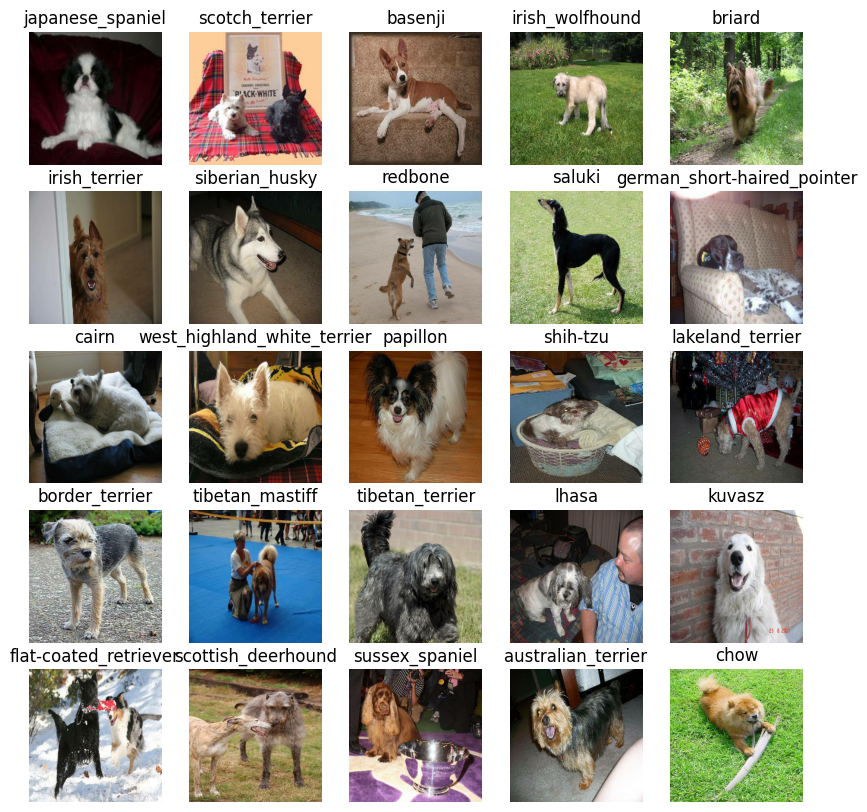

In [60]:
# now let's visualize the data in a training batch
show_25_images(train_images , train_labels)

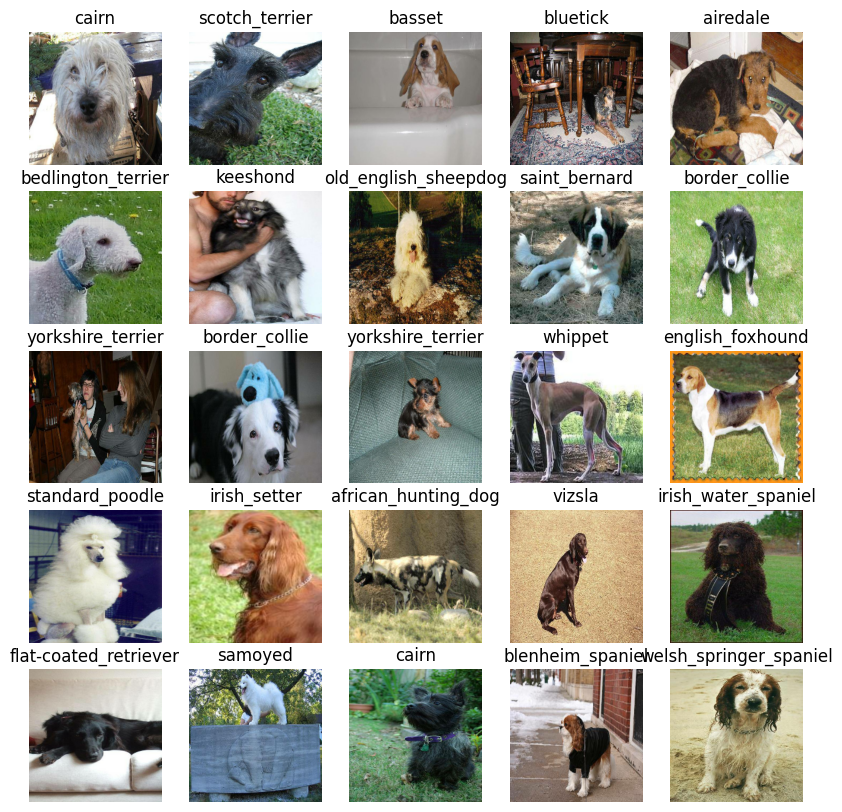

In [61]:
# now let's visualize our validation set
val_images , val_labels = next(val_data.as_numpy_iterator())
show_25_images(val_images , val_labels)

## Building a model 

Before we build a model , there are a few things we need to define:
* The input shape (our image shape  , in the form of tensors) to our model.
* The output shape (image labels , in the form of Tensors) of our model.
* The URL of the model we want to use from kaggle -
https://www.kaggle.com/models/google/mobilenet-v2/tensorFlow2/130-224-classification/2?tfhub-redirect=true

In [62]:
IMG_SIZE

224

In [63]:
len(unique_breeds)

120

In [81]:
# setup input shape to the model 
INPUT_SHAPE = [None , IMG_SIZE , IMG_SIZE , 3]  #batch , height , width , colour channels

# setup output shape of our model
OUTPUT_SHAPE = len(unique_breeds)

# setup model URL From Tensorflow HUB
MODEL_URL = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2"

Now we've got our inputs , outputs and model ready to go.
let's put them together into a keras deep learning model!

Knowing this, let's create a function which:
* Takes the input shape , output shape and the model we've chosen as paramters.
* Defines the layers in a keras model in sequential fashion (do this first , then this , then that ).
* Compiles the model (say it should be evaluated and improved).
* Build the model (tell the model the input shape it'll be getting).
* Returns the model.

All of these steps can be found here: https://www.tensorflow.org/guide/keras

In [82]:
# create a function which build a keras model 
def create_model(input_shape=INPUT_SHAPE , output_shape=OUTPUT_SHAPE , model_url=MODEL_URL):
    print("Building model with :", MODEL_URL)

    # setup the model layers
    model = tf.keras.Sequential([
        hub.KerasLayer(MODEL_URL),  # layer 1 input layer
        tf.keras.layers.Dense(units=output_shape,
                              activation= "softmax")   # layer 2 (output layer)
    ])

    # compile the model
    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(),
        metrics=["accuracy"]
    )

    # build the model 
    model.build(input_shape)

    return model

In [83]:
model = create_model()
model.summary()

Building model with : https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


## Creating Callbacks

Callbacks are helper function a model can use during training to do such things as save its progress, check its progress or stop trainig early if a model stop improving.


We'll create two callbacks , one for TensorBoard which helps track our models progress and another for early stopping which prevents our model from training for too long.


### TensorBoard Callback

To setup a TensorBoard callback , we need to do 3 things:

1. Load the tensorBoard notebook extension.
2. Create a TensorBoard callback which is able to save logs to a directly and pass it to our model's fit() function.
3. Visualize our models trainig log with the `%tensorboard` magic function (we'll do this after model training).


https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/Callback





In [67]:
# Load TensorBoard notebook extension
%load_ext tensorboard

In [68]:
import datetime

# create a function to build a TensorBoard callback
def create_tensorboard_callback():
    # create a log directory for storing  TensorBoard logs
    logdir = os.path.join("dog-breed-identification/logs",
                         # make it so the logs get tracked whenever we run an experiment
                         datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    return tf.keras.callbacks.TensorBoard(logdir)

### Early Stopping Callback

Early stopping helps stop our model from overfitting by stopping training if a certain evaluation metric stops improving.

https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping

In [69]:
# Create early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_accuracy",
                                                  patience=3)

## Training a model (on subset of data)

Our first model is only going to train on 1000 images, to make sure everything is wrong.

In [70]:
NUM_EPOCHS = 100   #@ param {type:"slider" , min:10 , max:100, step:10}

In [71]:
# check to make sure we're still  running on a GPU
print("GPU", "available(YESSS!!!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

GPU available(YESSS!!!!!!)


In [72]:
tf.config.list_physical_devices("GPU")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Let's create a function which trains a model.

* create  a model using `create_model()`
* setup a TensorBoard callback using `create_tensorboard_callback()`
* Call the `fit()` function on our model passing it the training data , validation data ,number of epochs to train for (NUM_EPOCHS) and the callbacks we'd like to use.
* Return the model. 

In [73]:
# Build the function to train and return a trained model
def train_model():
    """
    Trains a given a model and returns the trained version.
    """
    # create a model
    model = create_model()

    # create new TensorBoard session everytime we train a model
    tensorboard = create_tensorboard_callback()

    # Fit the model to the data passing it the callbacks we created
    model.fit(x=train_data,
    epochs = NUM_EPOCHS,
    validation_data = val_data,
    validation_freq=1,
    callbacks=[tensorboard , early_stopping]
             )

    # return the fitted model
    return model

In [74]:
# fit the model to the data
model = train_model()

Building model with : https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/130-224-classification/2


ValueError: Trying to load a model of incompatible/unknown type. 'C:\Users\rawat\AppData\Local\Temp\tfhub_modules\d8d2a97e87417c68090d6702b86b8c0b62e92876' contains neither 'saved_model.pb' nor 'saved_model.pbtxt'.

In [ ]:
model = loaded_1000_image_model

### Checking the TensorBoard logs
The TensorBoard magic function (%tensorboard) will access the logs directory we created earlier and visualize its contents.

In [ ]:
%tensorboard --logdir dog-breed-identification/logs

## Making and mEvaluating prediction using a trained model

In [ ]:
# make prediction on validation data (not used for training)
predictions = model.predict(val_data , verbose=1)

In [ ]:
predictions = model.predict(val_data , verbose=2)

In [ ]:
predictions 

In [ ]:
np.sum(predictions[0])

In [ ]:
predictions.shape

In [ ]:
# first predictions
index = 7
print(predictions[index])
print(f"max value (probability of prediction): {np.max(predictions[index])}")
print(f"sum: {np.sum(predictions[index])} ")
print(f"Max index:{np.argmax(predictions[index])}")
print(f"prdicted label: {unique_breeds[np.argmax(predictions[index])]}")

In [ ]:
Image(X_val[7])

In [ ]:
unique_breeds[7]

having the above functionality is great but we want to be able to do it at scale 

    
and it would be even better if we could see the image the prediction is being made on!

**Note:**   Predictions Probalities are also known as confidence levels.

In [ ]:
# Turn predictions probabilities into their respective label (easier to understand)
def get_pred_label(prediction_probabilities):
    """
    Turn an array of predictions probabilities into a label.
    """
    return unique_breeds[np.argmax(prediction_probabilities)]

# get a predicted label based on a array of predictions  probobilities
pred_label = get_pred_label(predictions[0])
pred_label

In [ ]:
val_data 

Now since our validation data is still in a batch dataset, we'll have to unbatchify it to make predictions on the validation images and then compare those predictions to the validations labels(truth labels). 

In [ ]:
# create a function to unbatch  val dataset
def unbatchify(data):
    """
    Takes a batched dataset of (image , label) Tensors and returns separate arrays of
    images and labels
    """
    images = []
    labels = []
    # loop through the unbatched data
    for image , label in data.unbatch().as_numpy_iterator():
        images.append(image)
        labels.append(unique_breeds[np.argmax(label)])
    return images , labels
    
# unbatchify the validation data 
val_images , val_labels = unbatchify(val_data)
# val_images[0] , val_labels[0]

In [ ]:
len(val_images) , len(val_labels)

In [ ]:
(val_labels[12])

In [ ]:
get_pred_label(predictions[0])

In [ ]:
plt.imshow(val_images[0])

Now we've got ways to get :
* Predictions labels
* valid labels( truth labels)
* Validation images

Let's make some function to make these all a bit more visaulize.


We'll create a function which:
* Takes an array of prediction probabilities , an array of truth  labels and an array of images and integers.
* convert the predictions probalities to a predicted label.
* plot the predicted label, its predicted probability , the truth label and the target image on a single plot.

In [ ]:
def plot_pred(n=0):
    """
    Vies the prediction , ground truth and image for sample n
    """
    # show the validation image
    plt.imshow(val_images[n])

    # show the x label as prediction label and title as truth label
    plt.title(f" truth_label:{(val_labels[n])}")
    # x_label
    plt.xlabel(f"prediction:{get_pred_label(predictions[n])} , prob_of_prediction:{np.argmax(predictions[n])}")

    # turn off the grid lines
    # plt.axis("Off")
    
    

In [ ]:
plot_pred( n=1)

In [1]:
def plot_pred(prediction_probabilities , labels , images , n=1):
    """
    view the prediction , ground truth and image for sample n
    """
    pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

    # get the pred label
    pred_label = get_pred_label(pred_prob)

    # plot the image and remove ticks
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])

    # change the color of the title depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # change plot titile to be predicted , probability of prediction and truth label
    plt.title("{} {:2.0f}% {}".format(pred_label,np.max(pred_prob)*100,true_label) , color=color)

In [2]:
plot_pred(prediction_probabilities= predictions , labels=val_labels , images=val_images , n=7)

NameError: name 'predictions' is not defined

Now we've got one function to visualize our models top prediction , let's make another to view our models top 10 predictions.

This function will:
* Take an input of prediction probabilities array and a ground truth array and an integer
* find  the prediction using `get_pred_label()`
* find the top 10:
  * prediction probabilities indexes
  * prediction probabilities values
  * prediction labels
* Plot the 10 prediction probability values and labels , coloring the true label green

In [ ]:
def plot_pred_conf(prediction_probabilities , labels , n=1):
    """
    plus the top 10 highest prediction confidence along with the truth 
    label for sample n.
    """
    pred_prob , true_label = prediction_probabilities[n] , labels[n]

    # get the predicted label
    pred_label = get_pred_label(pred_prob)

    # fing the top 10 prediction confidence indexes
    top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
    # find the top 10 prediction confidence values
    top_10_pred_values = pred_prob[top_10_pred_indexes]
    # find the top 10 prediction labels 
    top_10_pred_labels = unique_breeds[top_10_pred_indexes]
    
    # setup plot 
    top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
    top_10_pred_values,
    color="grey")
    plt.xticks(np.arange(len(top_10_pred_labels)),
              labels=top_10_pred_labels,
              rotation="vertical")

    # change color of true label
    if np.isin(true_label , top_10_pred_labels):
        top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
    else:
        pass

In [ ]:
plot_pred_conf(prediction_probabilities=predictions,
               labels=val_labels,
               n=9)

now we've got some function to help us visulize our prediction and evaluate our model, let's check out few.

In [ ]:
# let's check out a few prediction and their different values
i_multiplier = 50
num_rows = 3
num_cols = 2
num_images = num_rows* num_cols
plt.figure(figsize = (10*num_cols , 5* num_rows))
for i in range(num_images):
    plt.subplot(num_rows , 2*num_cols, 2*i+1)
    plot_pred(prediction_probabilities= predictions,
    labels = val_labels,
    images = val_images,
    n= i+i_multiplier)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_pred_conf(prediction_probabilities=predictions,
    labels= val_labels,
    n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show

#### creating confusion matrix with our model predictions and true labels?

In [ ]:
len(val_labels) , val_labels

In [ ]:
len(predictions) 

In [ ]:
predictions_list = []
for i in range(len(predictions)):
    predictions_list.append(get_pred_label(predictions[i]))

In [ ]:
(pd.crosstab(predictions_list ,val_labels)).shape

In [ ]:
(pd.crosstab(val_labels,predictions_list)).shape

In [ ]:
pd.crosstab(predictions_list ,val_labels)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(val_labels , predictions_list)

In [ ]:
confusion_matrix(val_labels , predictions_list).shape

## Saving and loading a trained model

In [ ]:
# create function to save a model 
def save_model(model , suffix = None):
    """
    save a given model in a models directory  and appends a suffix (string).
    """
    # create a model directory pathname with current time
    modeldir = os.path.join("dog-breed-identification/models",
    datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
    model_path = modeldir + "-" + suffix + ".h5"    # save format of model
    print(f"Saving model to: {model_path}......")
    model.save(model_path)
    return model_path

In [ ]:
# create a function to load a trained model
def load_model(model_path):
    """
    Loads a saved model from a specified path.
    """
    print(f"Loading saved model from: {model_path}")
    model = tf.keras.models.load_model(model_path,custom_objects = {"KerasLayer": hub.KerasLayer})
    return model

Now we've got functions to save and load a trained model, let's make they work!

In [ ]:
# save our model trained on 1000 images
save_model(model, suffix="1000-images-mobilenetv2-Adam")


In [ ]:
# load  a trainded model
loaded_1000_image_model = load_model("dog-breed-identification/modelS/20250828-023138-1000-images-mobilenetv2-Adam.h5")

In [ ]:
# evaluate the pre-saved model
model.evaluate(val_data)

In [ ]:
# evaluate the loaded model 
loaded_1000_image_model.evaluate(val_data)

In [ ]:
len(X) , len(y)

In [ ]:
full_data = create_data_batches(X , y)

In [ ]:
len(full_data)

In [ ]:
# create model for full_data
full_model = create_model()

In [ ]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
# no validation set when training on  all the data , so we can't monitor validation accuracy
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = 'accuracy',
                                                             patience=3)

**Note:** Running the call below will take a little while (maybe up to 30 minutes for the first epoch) because the GPU we're using in the runtime has to load all of the images into memory.

In [ ]:
# fit the full model to the full data
full_model.fit(x=full_data,
              epochs=NUM_EPOCHS,
              callbacks=[full_model_tensorboard, full_model_early_stopping])

In [ ]:
save_model( full_model,suffix = "full-image-set-mobilenetv2-Adam")

In [ ]:
# load the full model 
loaded_full_model = load_model('dog-breed-identification/models\\20250828-130048-full-image-set-mobilenetv2-Adam.h5')

### Making prediction  on test dataset 

Since our  model has been trained on images in the form of Tensor batches , to make predictions on the test data , we'll have to get it into the same format.

Luckily we created `create_data_batches()` earlier which can take a list of filenames as input and cover them into Tensor batches.

To make predictions on the test data, we'll :
* Get the test image filenames.
* Convert the filenames into test data batches using `create_data_batches()` and setting the `test_data` parameter to `True` (since the test data doesn't have labels).
* Make a predictions array by passing the test batches to the `predict()` method called on our model.

In [ ]:
# create a list of test filenames
file_path = 'dog-breed-identification/test/'
test_filenames = [file_path+fname  for fname in os.listdir(file_path)]


In [ ]:
test_filenames[:10]

In [ ]:
# creating test data batches
test_data = create_data_batches(test_filenames , test_data = True)

In [ ]:
test_data

In [ ]:
len(test_data)

In [ ]:
loaded_full_model.summary()

**Note:** Calling predict() on our full model and passing it the test data batch will not take a long time to run because we're using GPU

In [ ]:
# make a prediction on test data batch using the loaded full model 
test_predictions = loaded_full_model.predict(test_data,
                                             verbose =1) 

In [ ]:
test_predictions[0].shape

In [ ]:
# save predictions (Numpy array) to csv file (for access later)
np.savetxt("dog-breed-identification/preds_array.csv", test_predictions , delimiter=",")

In [ ]:
# Load predictions (numpy array) from csv file
test_prediction = np.loadtxt("dog-breed-identification/preds_array.csv", delimiter=",")

In [ ]:
test_prediction.shape

In [ ]:
type(test_prediction)

## Preparing Test Dataset Predictions For Kaggle

Looking at the kaggle sample submission, we find that it wants our models prediction probablity outputs in a DataFrame with an ID and a column for each different dog breed.
www.kaggle.com/competitions/dog-breed-identification/overview/evaluation

To get the data in this format, we'll:
* Create a pandas DataFrame with an ID column as well as a column for each dog breed
* Add data to the ID column by extracting the test image ID's from their filepaths.
* Add data (the prediction probabilities) to each of the dog breed columns.
* Export the dataframe as a CSV to submit it to Kaggle.

Method I

In [ ]:
del pd_test_predictions

In [ ]:
pd_test_predictions = pd.DataFrame()

In [ ]:
(pd_test_predictions)

In [ ]:
pd_test_predictions['id'] = pd.DataFrame(fname.split(".")[0] for fname in os.listdir("dog-breed-identification/test/"))

In [ ]:
pd_test_predictions

In [ ]:
pd_test_predictions[unique_breeds] = pd.DataFrame(test_prediction)

In [ ]:
pd_test_predictions

In [ ]:
# save predictions dataframe to CSV for submission to kaggle
pd_test_predictions.to_csv("dog-breed-identification/full_model_predictions_submission_2_mobilenetV2.csv",index=False)

Method II

In [ ]:
# create a pandas dataframe with empty columns
preds_df = pd.DataFrame(columns=["id"] + list(unique_breeds))

In [ ]:
preds_df

In [ ]:
# Append test image ID's to predictions DataFrame
test_ids = [os.path.splitext(path)[0] for path in os.listdir(file_path)]
preds_df["id"] = test_ids

In [ ]:
# Add the prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_prediction
preds_df

In [ ]:
# save our prediciton dataframe to CSV for submission to kaggle 
preds_df.to_csv("dog-breed-identification/full_model_predictions_submission_1_mobilenetV2.csv",
                index=False)

## making prediction on custom images

To make prediction on custom images, we'll:
* Get the filepaths of our own images.
* Turn the filepaths into data batches using `create_data_batches()`. And since our custom images won't have labels, we set the `test_data` parameter to `True`.
* Pass the custom images data batch to our model's `predict()` method.
* convert the prediction output probabilities to prediction labels.
* compare the predicted labels to the custom images.

In [ ]:
# get custom folder filepaths
custom_path = "dog-breed-identification/custom_photo/"

# creating list of images's filepaths
custom_images = [custom_path+fname for fname in os.listdir(custom_path)]

In [ ]:
custom_images

In [ ]:
# creating data batches from filepath
custom_data_batch = create_data_batches(X= custom_images , test_data = True)

In [ ]:
len(custom_data_batch)

In [ ]:
loaded_full_model.summary()

In [ ]:
custom_prediction = loaded_full_model.predict(x = custom_data_batch,
                                              verbose=1)

In [ ]:
unbatch_custom_images = []
for image in custom_data_batch.unbatch().as_numpy_iterator():
    unbatch_custom_images.append(image)

In [ ]:
plt.imshow(unbatch_custom_images[0])

In [ ]:
Image(custom_images[0])

In [ ]:
unique_breeds[np.argmax(custom_prediction[0])]

In [ ]:
custom_prediction.shape

In [ ]:
np.max(custom_prediction[1])

In [ ]:
np.argmax(custom_prediction[1])

In [ ]:
custom_prediction[1]

In [ ]:
# get custom images prediction labels
custom_pred_labels = [get_pred_label(custom_prediction[i]) for i in range(len(custom_prediction))]
custom_pred_labels

In [ ]:
# check custom image predictions
plt.figure(figsize=(10, 10))
for i, image in enumerate(unbatch_custom_images):
    plt.subplot( 2 , 2 , i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(custom_pred_labels[i])
    plt.imshow(unbatch_custom_images[i])

## Training a model with 80% of Full_data  and use 20% in validation set

### Splitting data into train and validation set

In [ ]:
X

In [ ]:
y

In [ ]:
len(X) , len(y)

In [ ]:
# let's split our data into train and validation sets
from sklearn.model_selection import train_test_split


# split them into training and validation of total size NUM_IMAGES
X_train , X_val , y_train , y_val = train_test_split( X,
                                                      y,
                                                      test_size = 0.2,
                                                      random_state =42)

len(X_train) , len(X_val) , len(y_train) , len(y_val)

In [ ]:
# creating trainind and validation data batches with batch_size = 16
BATCH_SIZE = 16
train_data = create_data_batches(X_train , y_train , batch_size = 16 , valid_data = False , test_data=False)
val_data = create_data_batches(X_val , y_val , batch_size = 16 , valid_data = True , test_data=False)

In [ ]:
len(train_data) , len(val_data)

In [ ]:
images , labels = next(train_data.as_numpy_iterator())

In [ ]:
images.shape , labels.shape

In [ ]:
model_train_validation_full_data = create_model()

In [ ]:
model_train_validation_full_data.fit(x=train_data,
                          epochs = NUM_EPOCHS,
                          validation_data = val_data,
                          validation_freq=1,
                          callbacks=[create_tensorboard_callback() , early_stopping])

In [ ]:
# make a prediction on test data batch using the loaded full model 
test_predictions = model_train_validation_full_data.predict(test_data,
                                                            verbose =1) 

In [ ]:
type(test_predictions)

In [ ]:
pd_test_predictions = pd.DataFrame()

In [ ]:
pd_test_predictions['id'] = pd.DataFrame(fname.split(".")[0] for fname in os.listdir("dog-breed-identification/test/"))

In [ ]:
pd_test_predictions[unique_breeds] = pd.DataFrame(test_predictions)

In [ ]:
pd_test_predictions

In [ ]:
# save predictions dataframe to CSV for submission to kaggle
pd_test_predictions.to_csv("dog-breed-identification/model_train_validation_full_data_predictions_submission_2_mobilenetV2.csv",index=False)